# **`Exploratory Data Analysis-1`**

`Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.`

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

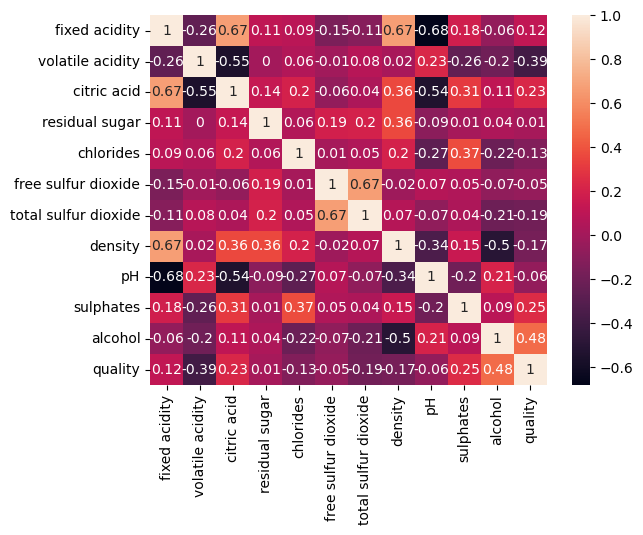

In [3]:
sns.heatmap(df.corr().round(2),annot=True)

In [7]:
#Testing feature importance using logistic regression
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load your data
target = "quality"
y= df[target]
X = df.drop(target,axis=1)

# Instantiate Logistic Regression model
lr = LogisticRegression()

# Fit model to data
lr.fit(X, y)

# Get feature coefficients
coefficients = lr.coef_[0]

# Sort coefficients in descending order
indices = np.argsort(np.abs(coefficients))[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], coefficients[indices[f]]))

Feature ranking:
1. feature 10 (-0.204093)
2. feature 1 (0.099925)
3. feature 5 (0.079611)
4. feature 3 (0.050216)
5. feature 6 (-0.047283)
6. feature 2 (-0.023174)
7. feature 9 (-0.022405)
8. feature 0 (0.011439)
9. feature 4 (0.010387)
10. feature 8 (0.009179)
11. feature 7 (-0.003426)


Alcohol , Volatile acidity and free sulphur dioxide seem to be some of the important features which show fair correlation with wine quality and hence they may be best suited for machine learning. Other features show weak correlation and may not yeild good results in predicitng the wine quality

`Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.`

<Axes: >

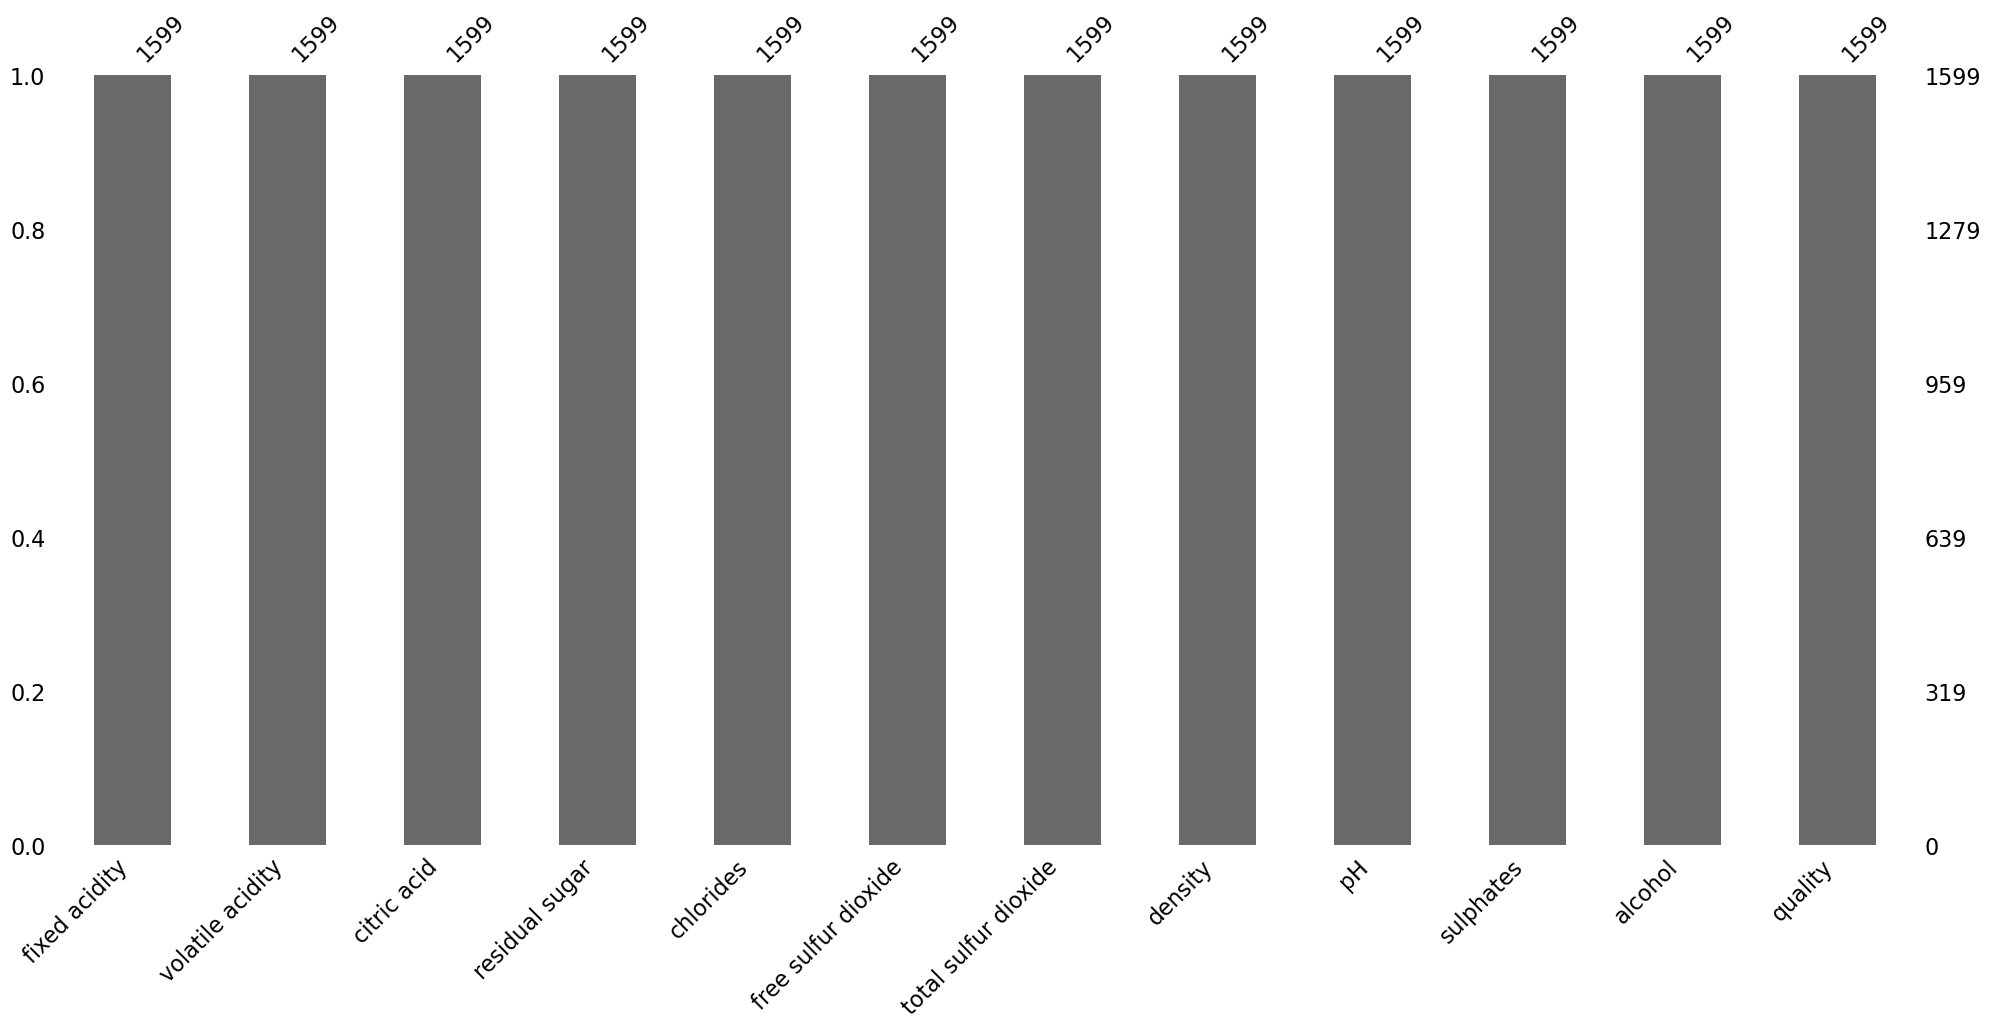

In [11]:
import missingno as msno
msno.bar(df)

There are no missing values in wine quality dataset . 

Missing value imputation techniques are used to fill in missing data points in a dataset. There are several methods of missing value imputation, each with its own advantages and disadvantages. Here are some of the most common techniques:

1. Mean/Median imputation:
Advantages: Easy to implement and does not require a lot of computational resources. It also does not affect the distribution of the variables.
Disadvantages: Mean/median imputation can introduce bias in the data if the missing values are not missing at random. It also reduces the variance of the data, which can affect the performance of some models.

2. Mode imputation:
Advantages: Mode imputation is easy to implement and works well for categorical variables.
Disadvantages: Mode imputation also can introduce bias if the missing values are not missing at random. It also assumes that the mode is representative of the missing values.

3. Hot-deck imputation:
Advantages: Hot-deck imputation uses similar observations to fill in missing values, which can be more accurate than mean/median/mode imputation. It also preserves the original distribution of the data.
Disadvantages: Hot-deck imputation requires more computational resources and can be less accurate if there are few similar observations to fill in missing values.

4. Regression imputation:
Advantages: Regression imputation can be very accurate if there is a strong correlation between the variable with missing values and other variables in the dataset. It also preserves the original distribution of the data.
Disadvantages: Regression imputation requires more computational resources and can be less accurate if there is no strong correlation between the variable with missing values and other variables in the dataset.

5. Multiple Imputation:
Advantages: Multiple imputation is one of the most accurate missing data imputation techniques that accounts for variability and uncertainty associated with missing values by creating multiple plausible imputed data sets.
Disadvantages: Multiple imputation is computationally intensive and can be time-consuming, and it may not always be feasible or possible depending on the dataset and the software available.

6. K-nearest neighbors imputation:
Advantages: K-nearest neighbors imputation is effective for datasets with high dimensionality and for data sets where there is a strong correlation between the variable with missing values and other variables in the dataset.
Disadvantages: K-nearest neighbors imputation can be sensitive to the choice of K and the distance metric used, and it can be computationally expensive for large datasets.

In summary, there is no perfect missing value imputation technique, and the choice of technique will depend on the dataset, the type of variable, the degree of missingness, and the analysis goal. It is also important to evaluate the performance of different imputation methods and assess the impact of missing data on the results.

`Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?`

`and`

`Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?`

In [9]:
df = pd.read_csv("D:\pwskills-Data_Science_Masters\machine learning\ml video practice notebooks\stud.csv")

### Preliminary checks
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [10]:
## Check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
## check duplicates
df.duplicated().sum()

0

In [12]:
## check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
## 3.1 Checking the number of uniques values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
## Check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## **Insights or Observations**

- From the above description of numerical data, all the means are very close to each other - Between 66 and 69
- All the standard deviation are also close - Between 14.6 to 15.19
- While there is a minimum of 0 for maths, others are having 17 and 10 value

In [15]:
## segrregate numerical and categorical features
numerical_feature = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]
print(numerical_feature)
print(categorical_feature)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
## Aggregate the total score with mean
df["total_score"] = (df["math_score"] + df["reading_score"]+df["writing_score"])
df["average"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


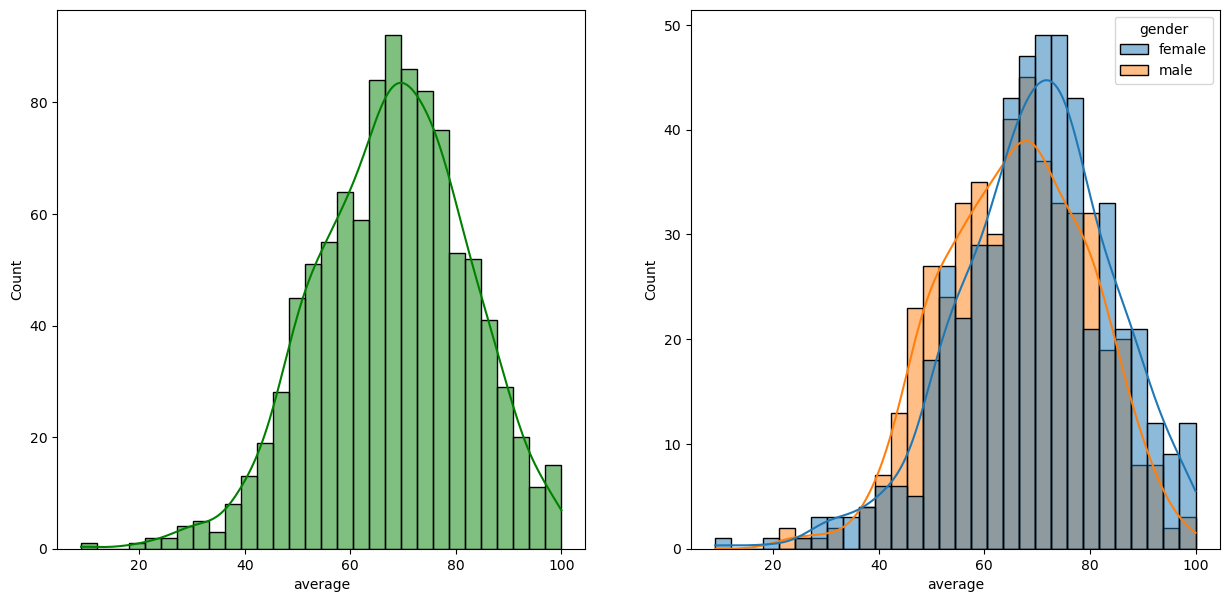

In [22]:
### explore more visualiztion
fig ,ax = plt.subplots(1,2,figsize= (15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="gender")
plt.show()

## Insights
- Female student tend to perform well than male student

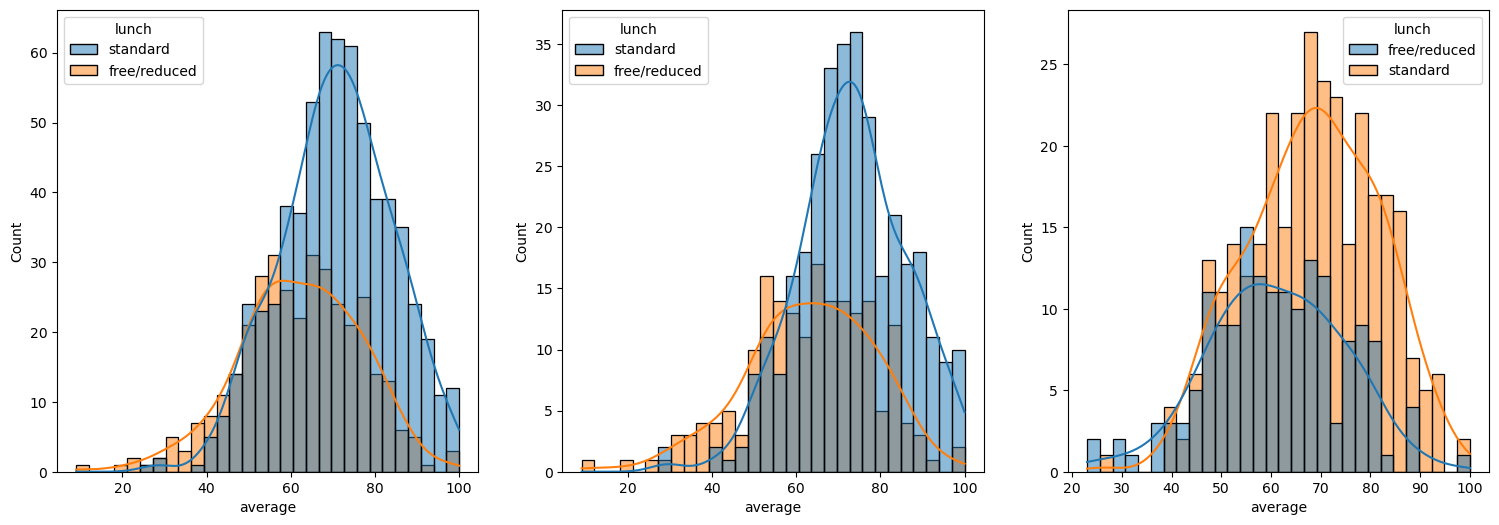

In [23]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="average",bins=30,kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average",bins=30,kde=True,hue="lunch")
plt.show()

## Insights
- Standard lunch helps students perform well in exams
- Standard lunch helps students perform well in exams in both male and female

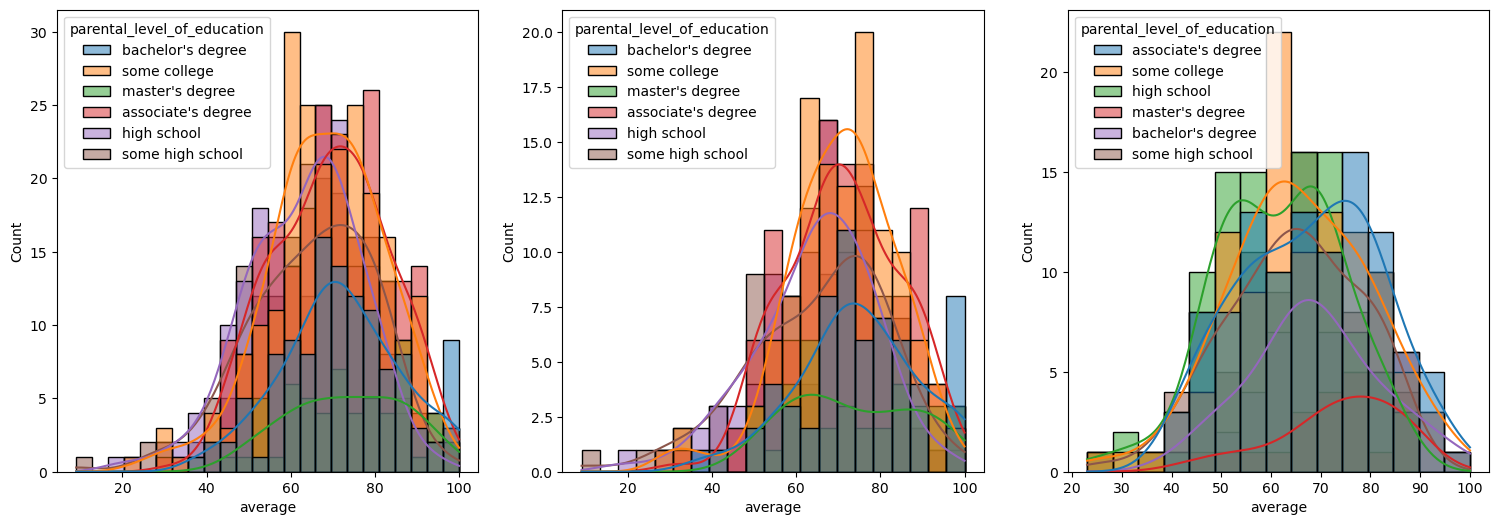

In [24]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="parental_level_of_education")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="parental_level_of_education")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="parental_level_of_education")
plt.show()

## Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students

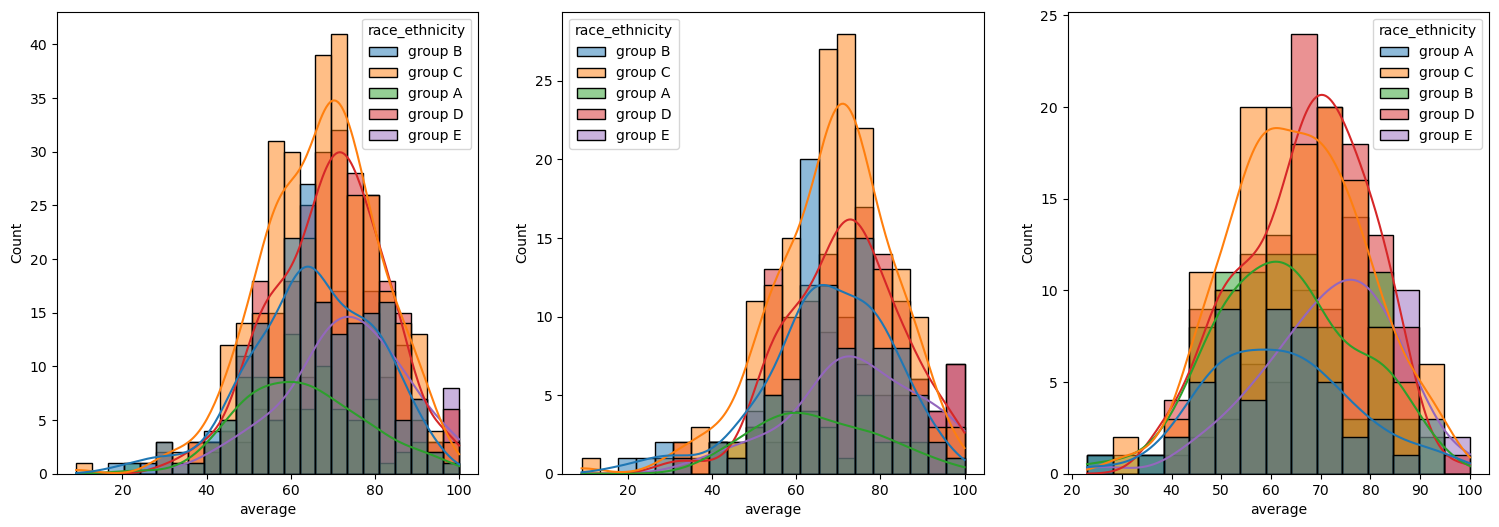

In [25]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df,x="average",kde=True,hue="race_ethnicity")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="race_ethnicity")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="race_ethnicity")
plt.show()

## Insights
- Students pf group A and group B tends to perform poorly in exam
- Students pf group A and group B tends to perform poorly in exam irrespective of gender

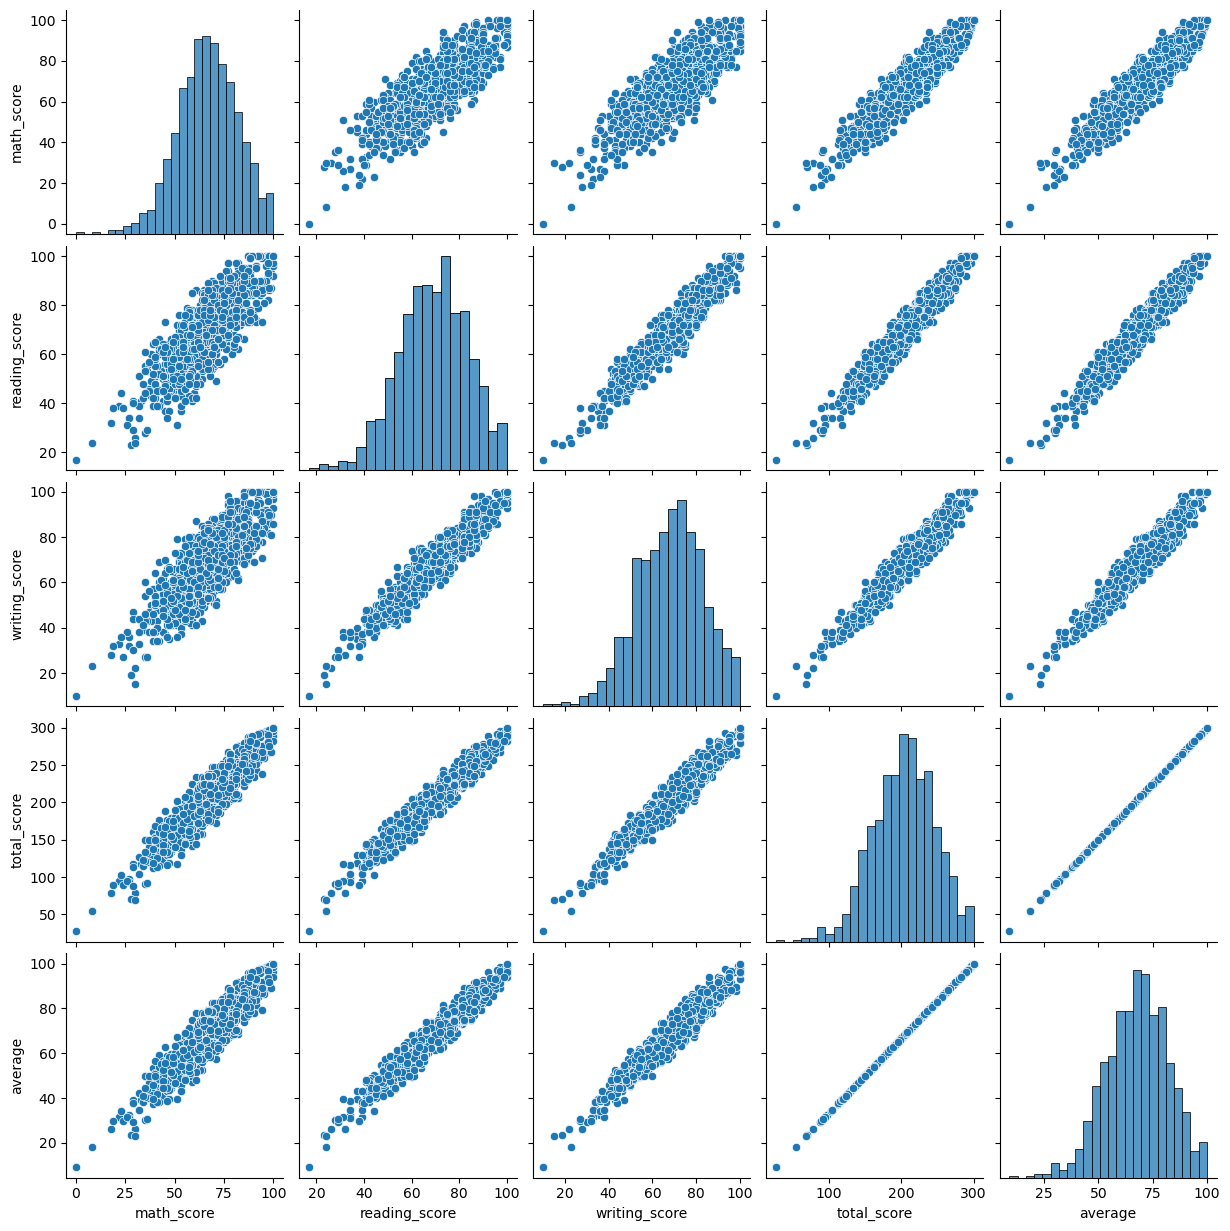

In [26]:
sns.pairplot(df)

<Axes: >

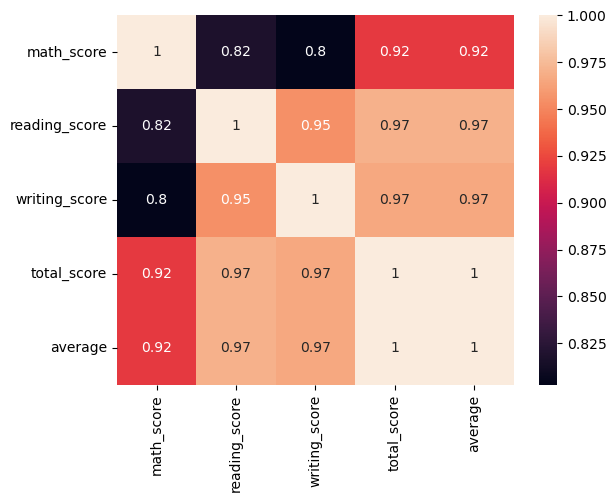

In [27]:
sns.heatmap(df.corr(),annot=True)

## Observation:
All numerical scores correlate positively very well with each other and total score and these variables can now be considered for our model building

In [21]:
#Feature Engineering for categorical varaibles
# Ordinal encoding for praental level of education
df["parental_level_of_education"] = df["parental_level_of_education"].map({"bachelor's degree":3, 'some college':1, "master's degree":4,
       "associate's degree":2, 'high school':0, 'some high school':0})

In [25]:
#Onehot encoding 
from sklearn.preprocessing import OneHotEncoder
encoder  = OneHotEncoder()

In [27]:
data = df[['gender',
 'race_ethnicity',
 'lunch',
 'test_preparation_course']]

In [28]:
#fit data
encoder.fit(data)

OneHotEncoder()

In [29]:
#transform data
encoded_data = encoder.transform(data).toarray()

In [30]:
encoded_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())

In [33]:
final = pd.concat([df,encoded_df],axis=1)

In [36]:
final.drop(['gender', 'race_ethnicity','lunch','test_preparation_course'],axis=1,inplace=True)

<Axes: >

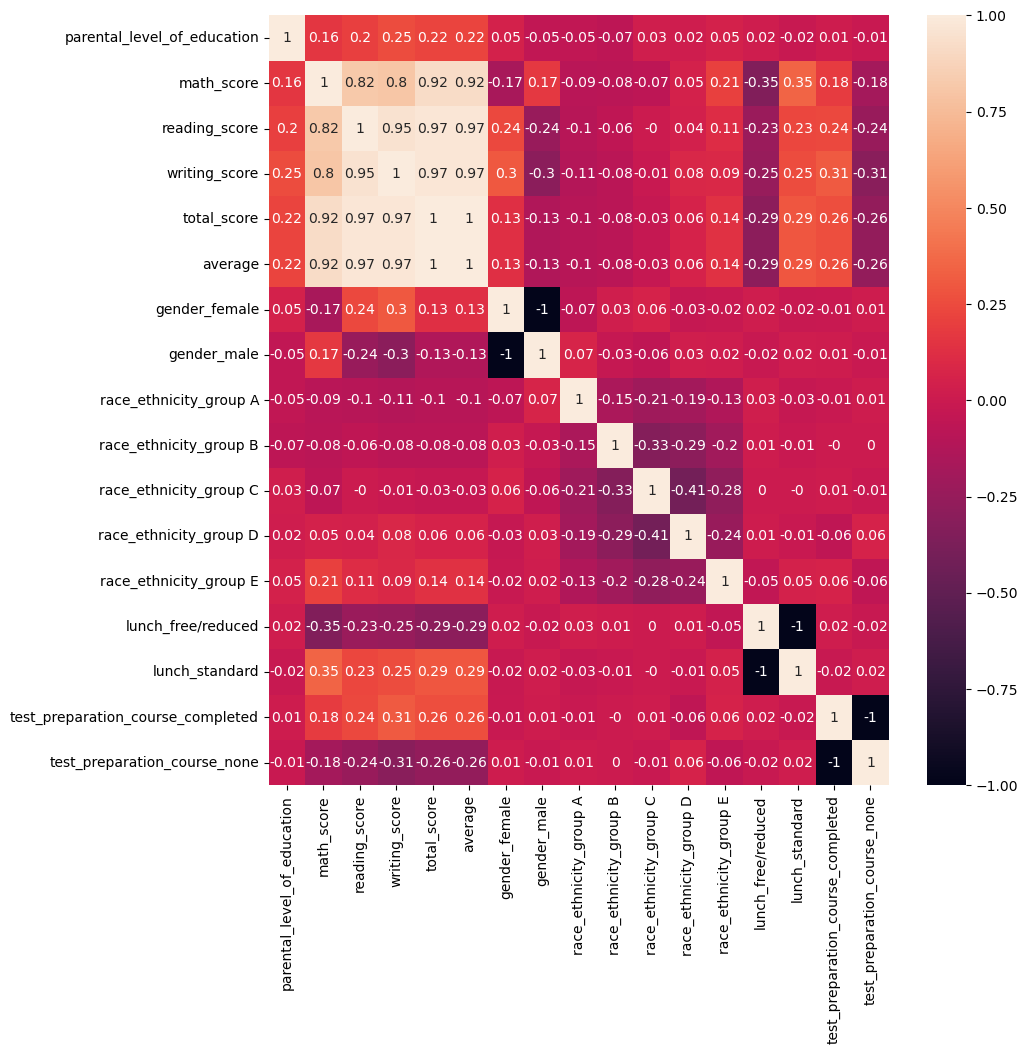

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(final.corr().round(2),annot=True)

`Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?`

In [36]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Preliminary checks
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [37]:
## Check missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [38]:
## check duplicates
df.duplicated().sum()

240

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
## check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [41]:
## 3.1 Checking the number of uniques values in each column
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [42]:
## Check the statistics of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Insights or Observations

- From the above description of numerical data, all the means are spread out between features and they require standardization
- All the standard deviation of free sulphur dioxide and total sulfur dioxide are 10.44 and 33.4 respectively and they may contain outliers
- All features are in different units

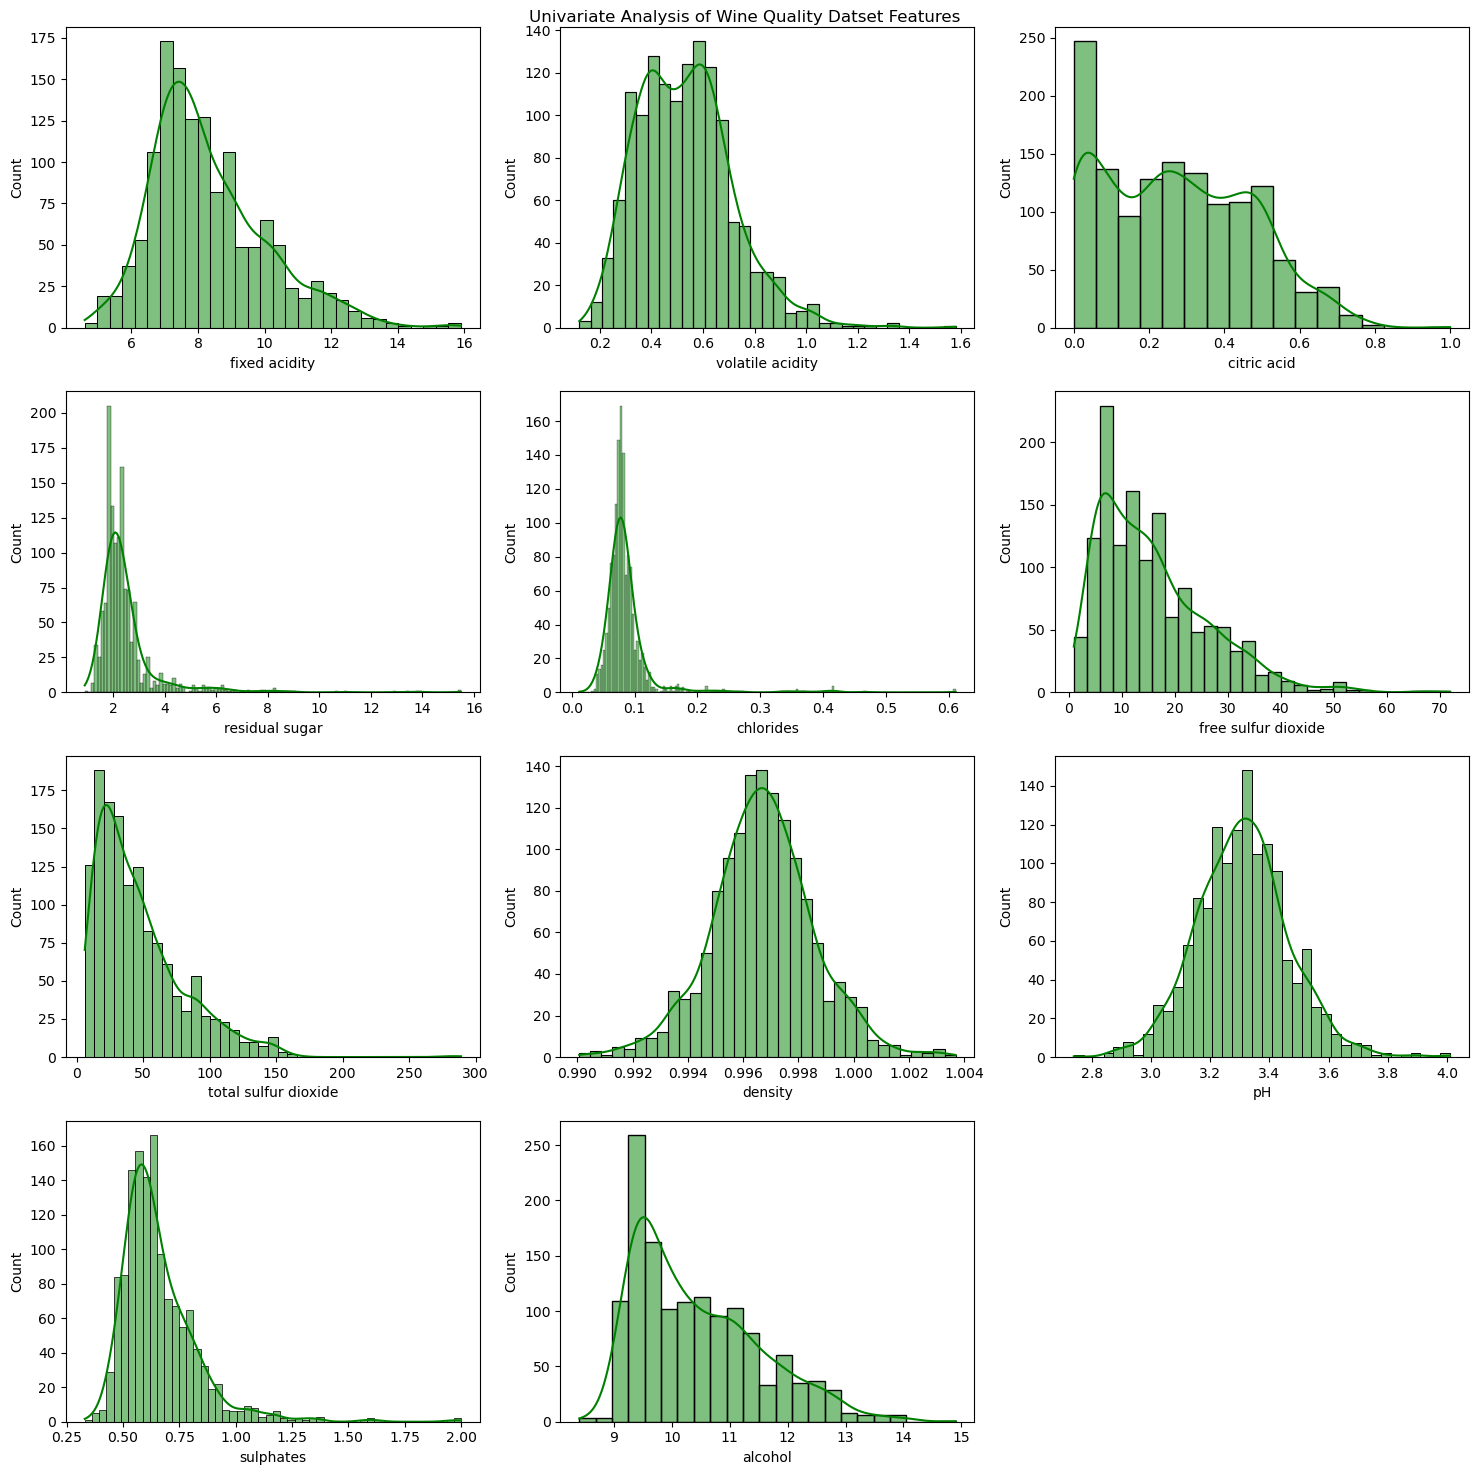

In [105]:
# Exploring the normality of features
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
fig , ax = plt.subplots(nrows=4 , ncols= 3 , figsize = (15,15))
plt.suptitle("Univariate Analysis of Wine Quality Datset Features")
for i in range(0,len(cols)):
    plt.subplot(4 , 3 , i + 1)
    sns.histplot(data=df , x = cols[i] , kde = True , color= "g")
    plt.tight_layout()
fig.delaxes(ax[3,2])

# Observations:
The features 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates' and 'alcohol' do not exhibit normality in distribution and they are right skewed (positively skewed)

If you have a non-normal distribution, there are several transformations you can apply to make the data more normal or at least improve its distributional properties. Here are some common transformations:

1. Log transformation: If the data is positively skewed or has a long right tail, you can apply a logarithmic transformation to make it more symmetric. This is particularly useful when the data has a multiplicative relationship, such as in financial data or other count data.

2. Box-Cox transformation: The Box-Cox transformation is a family of power transformations that can be used to transform non-normal data to a normal distribution. It uses a parameter lambda to determine the degree of transformation, and it can handle both positively and negatively skewed data.

3. Square-root transformation: If the data is positively skewed, you can apply a square-root transformation to make it more symmetric. This is useful for count data or other data that has a non-negative support.

It's important to note that these transformations do not always work perfectly, and they can introduce other issues such as heteroscedasticity, outliers, or dependence. Therefore, it's recommended to evaluate the effects of the transformation on the distribution and the statistical properties of the data, and to consider alternative methods such as nonparametric tests or robust statistics if necessary.

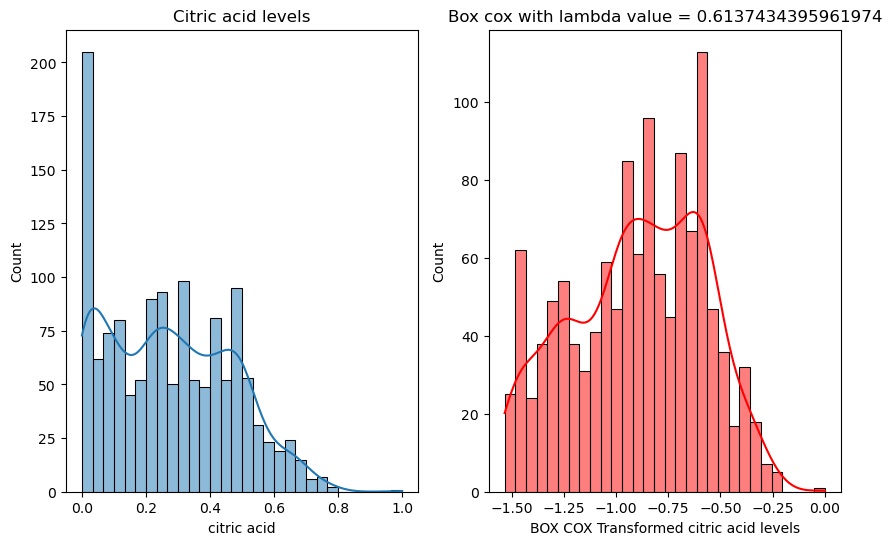

In [104]:
## Example of box cox transformation with citric acid levels
from scipy.stats import boxcox
data ,l = boxcox(df["citric acid"][df["citric acid"]>0])
plt.subplots(1,2,figsize = (10,6))

plt.subplot(1,2,1)
sns.histplot(data= df , x = "citric acid",bins =30,kde=True)
plt.title("Citric acid levels")

plt.subplot(1,2,2)
sns.histplot(data,bins =30,kde=True,color="r")
plt.title("Box cox with lambda value = {}".format(l))
plt.xlabel("BOX COX Transformed citric acid levels")

plt.show()

`Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?`

In [108]:
#We are now implementing PCA to reduce the number of features to predict wine quality which is the target
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [109]:
#importing libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [110]:
# dividing the data into features and target
target = "quality"
y= df[target]
X = df.drop(target,axis=1)

In [114]:
# Performing PCA on X to reduce the number of features
# Scale data before applying PCA
scaling=StandardScaler()
scaled_data = scaling.fit_transform(X)

In [113]:
# Instantiate PCA object
pca = PCA()

In [115]:
# Fit PCA model
pca.fit(scaled_data)

PCA()

In [116]:
# Calculate cumulative explained variance
variance = np.cumsum(pca.explained_variance_ratio_)

In [117]:
# Determine number of principal components needed to explain 90% of variance
n_components = np.argmax(variance >= 0.9) + 1

In [118]:
# Fit PCA model with n_components
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

PCA(n_components=7)

In [119]:
# Transform data using PCA
X_pca = pca.transform(scaled_data)

In [120]:
X_pca

array([[-1.61718452,  0.48304706, -1.76538065, ...,  0.0112697 ,
        -0.91806225, -0.16843296],
       [-0.7597499 ,  1.85190223, -0.87078223, ...,  0.11236163,
         0.91703154, -0.93595834],
       [-0.7299115 ,  0.89022684, -1.15338249, ...,  0.02257443,
         0.40172915, -0.47673072],
       ...,
       [-2.17130497,  0.89054086,  1.80767947, ...,  0.07209456,
        -0.73430392, -0.68163713],
       [-2.23816515,  0.98568537,  0.64387164, ...,  0.02869917,
        -0.89944475, -0.38554554],
       [-0.43087385, -0.54842879,  1.61710742, ...,  0.42771134,
        -0.55491419,  1.1749135 ]])

Frist we scale the data using standard scaler . Then we instantiate a PCA object and fit the model to the data using the fit() method. We calculate the cumulative explained variance using the explained_variance_ratio_ attribute and the cumsum() function from NumPy. We determine the number of principal components needed to explain at least 90% of the variance by finding the index of the first element in the cumulative variance array that is greater than or equal to 0.9. We add 1 to this index because Python indexes start at 0, and we need to account for the first principal component. Finally, we fit the PCA model with the specified number of components and transform the data using the transform() method.

Note that in practice, it is important to carefully choose the number of principal components based on the tradeoff between variance explained and model complexity. Additionally, it is often helpful to visualize the principal components or the transformed data to gain insight into the underlying structure of the data.

In [121]:
print("Minimum number of principal components required to explain 90% of variance:", n_components)

Minimum number of principal components required to explain 90% of variance: 7
